# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [8]:
sinasc_2 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_2.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [9]:
sinasc_2.shape

(27028, 3)

In [10]:
sinasc_2.IDADEMAE.isna().sum()

0

In [11]:
sinasc_2.IDADEPAI.isna().sum()

19421

In [12]:
sinasc_2.munResNome.isna().sum()

0

In [13]:
sinasc_2.dropna().shape

(7607, 3)

In [14]:
result = sinasc_2.dropna().groupby('munResNome').mean()
result

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.892857,29.548701
Alto Alegre dos Parecis,24.679104,29.179104
Alto Paraíso,22.833333,28.833333
Alvorada D'Oeste,26.825243,30.757282
Ariquemes,28.133333,32.466667
Buritis,24.750000,30.812500
Cabixi,32.166667,34.333333
Cacaulândia,31.000000,36.333333
Cacoal,26.978605,30.931854


Apesar de geralmente Municípios do interior possuirem uma média etária mais baixa para Idade das mães, é possível observar Municípios pequenos com idade média das mães, como Pimeitas do Oeste, Itapuã do Oeste, Colorado do Oeste.

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [17]:
# Criar novo dataframe apenas com as colunas de interesse

sinasc_3 = sinasc_raw[['DTNASC', 'ESCMAE', 'SEXO', 'PESO']].copy()
sinasc_3.head()

,DTNASC,ESCMAE,SEXO,PESO
0,2019-02-19,8 a 11 anos,Masculino,3685
1,2019-02-21,8 a 11 anos,Feminino,3055
2,2019-02-25,8 a 11 anos,Feminino,3460
3,2019-03-20,12 anos ou mais,Feminino,2982
4,2019-03-23,8 a 11 anos,Feminino,3310


In [18]:
data_aniv = '2019-10-26'
sinasc_3 = sinasc_3[sinasc_3['DTNASC'] == data_aniv]
sinasc_3.head()


,DTNASC,ESCMAE,SEXO,PESO
14535,2019-10-26,12 anos ou mais,Masculino,3585
14577,2019-10-26,4 a 7 anos,Feminino,2550
14678,2019-10-26,8 a 11 anos,Masculino,3210
14679,2019-10-26,8 a 11 anos,Masculino,2780
14680,2019-10-26,8 a 11 anos,Masculino,3595


In [19]:
# 3. Agrupar por SEXO e ESCMAE
sinasc_4 = sinasc_3.groupby(['SEXO', 'ESCMAE'])


In [20]:
# 4. Calcular a média do PESO
resultado = sinasc_4['PESO'].mean().reset_index()

# Mostrar o resultado
print(resultado)

        SEXO           ESCMAE         PESO
0   Feminino  12 anos ou mais  3128.888889
1   Feminino       4 a 7 anos  3315.000000
2   Feminino      8 a 11 anos  3387.142857
3  Masculino  12 anos ou mais  3597.777778
4  Masculino       4 a 7 anos  3417.777778
5  Masculino      8 a 11 anos  3281.280000


In [21]:
# 5. Pivotar a tabela para facilitar o gráfico
pivot = resultado.pivot(index='ESCMAE', columns='SEXO', values='PESO')

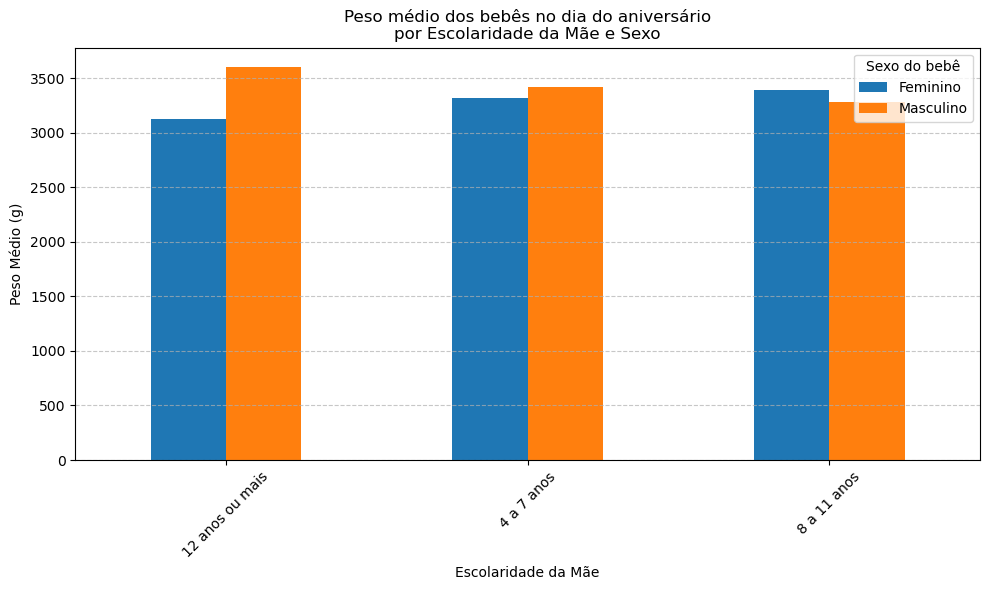

In [22]:
# 6. Plotar o gráfico
pivot.plot(kind='bar', figsize=(10, 6))

plt.title('Peso médio dos bebês no dia do aniversário\npor Escolaridade da Mãe e Sexo')
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Peso Médio (g)')
plt.legend(title='Sexo do bebê')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

É possível observar uma diferença maior no peso médio do bebê de sexo feminino e masculino para mães com escolaridade de 12 anos ou mais, referente à data em análise, 26/10.

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [25]:
sinasc_raw.groupby('munResNome')['DTNASC'].count().sort_values(ascending=True)[0:3].to_frame()

,DTNASC
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40


In [124]:
sinasc_raw.groupby('munResNome').aggregate({

   'DTNASC': [('Contagem', 'count')],
   'IDADEMAE': [('Média','mean'), ('Máxima','max'), ('Mínima', 'min')],
   'IDADEPAI': [('Média','mean'), ('Máxima','max'), ('Mínima', 'min')]

}).sort_values(by=('DTNASC','Contagem'), ascending=True)[:3]

DTNASC  IDADEMAE                 IDADEPAI         \
                        Contagem     Média Máxima Mínima      Média Máxima   
munResNome                                                                   
Município ignorado - RO        1  24.00000     24     24  22.000000   22.0   
Castanheiras                  32  27.28125     39     17  30.392857   43.0   
Pimenteiras do Oeste          40  25.07500     40     14  35.600000   45.0   

                                
                        Mínima  
munResNome                      
Município ignorado - RO   22.0  
Castanheiras              17.0  
Pimenteiras do Oeste      25.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [37]:
sinasc = sinasc_raw[['munResNome', 'DTNASC', 'IDADEMAE', 'IDADEPAI', 'QTDFILVIVO']]

In [38]:
# Dropar valores faltantes nas colunas selecionadas
sinasc = sinasc.dropna()

In [39]:
# Converter DTNASC para datetime (caso ainda não esteja)
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])

In [40]:
# Filtrar apenas os nascimentos do mês de março (mês 3)
sinasc_marco = sinasc[sinasc['DTNASC'].dt.month == 3]

In [41]:
# Contar número de nascimentos por município no mês de março
nascimento_marco = sinasc_marco.groupby('munResNome')['DTNASC'].count().sort_values(ascending=False)

In [42]:
# Identificar o município com MAIOR número de nascimentos
municipio_mais_nascimento_marco = nascimento_marco.index[0]
print("Município com mais nascimentos em março:", municipio_mais_nascimento_marco)

Município com mais nascimentos em março: Cacoal


In [43]:
# Filtrar dados apenas desse município
dados_municipio_marco = sinasc_marco[sinasc_marco['munResNome'] == municipio_mais_nascimento_marco].copy()

In [44]:
#Calcular a a quantidade de filhos vivos media, maxima, minima nesse municipio
resumo_filhos_vivos = dados_municipio_marco.groupby('munResNome').agg(
    media_filhos_vivos=('QTDFILVIVO', 'mean'),
    max_filhos_vivos=('QTDFILVIVO', 'max'),
    min_filhos_vivos=('QTDFILVIVO', 'min')
).reset_index()

resumo_filhos_vivos

,munResNome,media_filhos_vivos,max_filhos_vivos,min_filhos_vivos
0,Cacoal,0.92623,7.0,0.0


In [45]:
resumo_idades = dados_municipio_marco.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].agg(['min', 'median', 'max']).reset_index()
resumo_idades

munResNome IDADEMAE            IDADEPAI             
                  min median max      min median   max
0     Cacoal       15   26.0  40     17.0   30.0  47.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [48]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [49]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [50]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')